In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.patches import Rectangle
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

# UPLOAD DATASET

In [2]:
data = pd.read_csv("/kaggle/input/tyres-train/tyres_train.csv", sep = ",")

data.head(10)

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0
5,20.042,38,0,0.04,0.01,-0.20,2,1,160.5,0,0,0,5.96,NaN,1,0
6,21.172,33,1,0.39,0.01,-2.28,0,0,470.0,3,0,0,6.47,NaN,1,0
7,16.706,32,0,0.62,0.05,-3.96,3,1,148.5,7,2,0,5.39,NaN,1,0
8,17.616,25,1,0.16,0.01,-6.88,0,1,103.5,8,0,1,5.32,63.6,1,0
9,17.370,34,0,0.27,0.01,-1.28,2,0,345.5,5,2,0,6.31,NaN,0,0


In [91]:
data = pd.read_csv("tyres_train.csv", sep = ",")

data.head(10)

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0
5,20.042,38,0,0.04,0.01,-0.20,2,1,160.5,0,0,0,5.96,NaN,1,0
6,21.172,33,1,0.39,0.01,-2.28,0,0,470.0,3,0,0,6.47,NaN,1,0
7,16.706,32,0,0.62,0.05,-3.96,3,1,148.5,7,2,0,5.39,NaN,1,0
8,17.616,25,1,0.16,0.01,-6.88,0,1,103.5,8,0,1,5.32,63.6,1,0
9,17.370,34,0,0.27,0.01,-1.28,2,0,345.5,5,2,0,6.31,NaN,0,0


# DATA OBSERVATION AND PREPARATION

In [3]:
data.dtypes
# categorical variables are no "object" type

vulc               float64
perc_nat_rubber      int64
wiring_strength      int64
weather            float64
perc_imp           float64
temperature        float64
tread_type           int64
tyre_season          int64
elevation          float64
month                int64
tread_depth          int64
tyre_quality         int64
perc_exp_comp      float64
diameter           float64
add_layers           int64
failure              int64
dtype: object

In [92]:
data.shape

(3000, 16)

In [5]:
data.isnull().sum()
# the variable "diameter" is almost empty --> impossible to proceed with substitution

vulc                  0
perc_nat_rubber       0
wiring_strength       0
weather               0
perc_imp              0
temperature           0
tread_type            0
tyre_season           0
elevation             0
month                 0
tread_depth           0
tyre_quality          0
perc_exp_comp         0
diameter           2110
add_layers            0
failure               0
dtype: int64

Through the observation of the dataset we can see that most of the data don't have a numeric value in the column "diameter". For this reason, we have decided to drop that column as it does not provide any relevant information.

In [93]:
#dropping all column "diameter"
d="diameter"
data_dropped = data.drop(columns=d)

data_dropped.head()

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,1,0


In [94]:
data_dropped.isnull().sum()
# no more NaN observations

vulc               0
perc_nat_rubber    0
wiring_strength    0
weather            0
perc_imp           0
temperature        0
tread_type         0
tyre_season        0
elevation          0
month              0
tread_depth        0
tyre_quality       0
perc_exp_comp      0
add_layers         0
failure            0
dtype: int64

The dataset now doesn't contain any NaN values, so we can start to visualize the data and apply the required transformations.

failure
0    1992
1    1008
dtype: int64


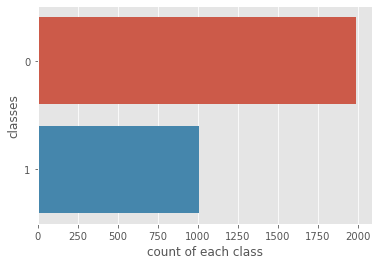

In [8]:
print(data_dropped.groupby('failure').size())

%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=data_dropped.failure ,data=data_dropped)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

We noticed in this plot that the dataset is unbalanced, so our idea is to try to perform oversampling on the training set in the next phase of identification of the best model.

## Categorical variables

Since the dataset has both numerical and categorical attributes, we select the categorical variables in order to analyze their ditribution.

In [95]:
selection_categorical=['tread_type', 'tyre_season','month', 'tread_depth', 'wiring_strength', 'tyre_quality',
       'add_layers']
data_categorical=data_dropped[selection_categorical]
data_categorical.head()

,tread_type,tyre_season,month,tread_depth,wiring_strength,tyre_quality,add_layers
0,0,1,8,0,1,1,1
1,2,0,11,1,1,0,1
2,0,0,0,1,1,0,1
3,1,0,7,3,1,1,1
4,0,1,2,2,2,0,1


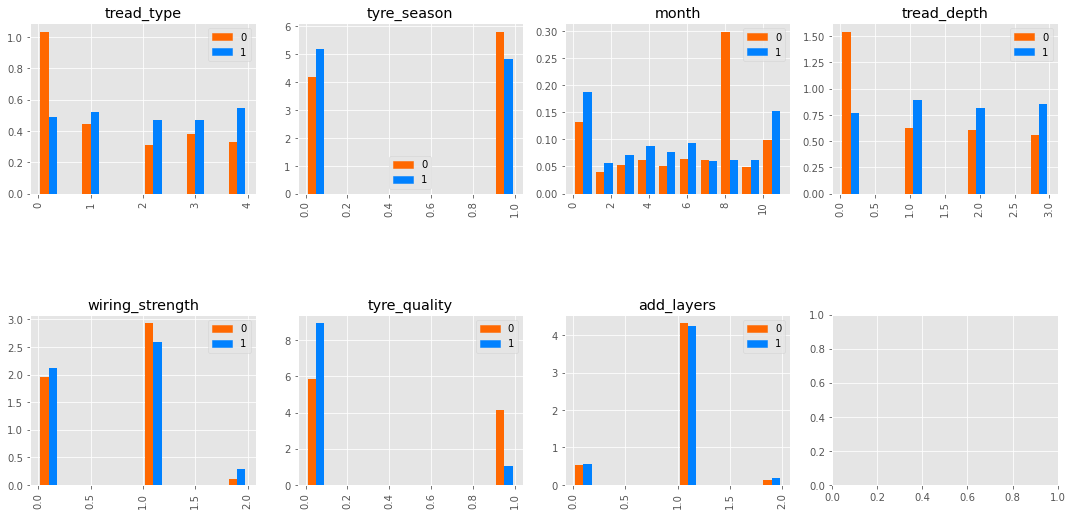

In [96]:
# Visualize categorical variables
data_0=data_categorical[data_dropped['failure']==0] # records wih target==0
data_1=data_categorical[data_dropped['failure']==1] # records wih target==1

cmap = plt.get_cmap('jet')
col=[cmap(0.8),cmap(0.25)]
fig, axes = plt.subplots(2, 4,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in data_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([data_0[x],data_1[x]],density=True,color=col)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    handles = [Rectangle((0,0),1,1,color=c)for c in col]
    labels= ["0","1"]
    plt.legend(handles, labels)
    i+=1
plt.show()

The dataset is not only composed of numerical attributes but also of categorical ones. Plotting each histogram to analyze their distribution, it is possible to observe that the attribute "add_layers" has the same distibution on target 0 and 1. Following this consideration we took the decision to remove that attribute too.

In [97]:
ad="add_layers"
data_categorical = data_categorical.drop(columns=ad)
selection_categorical = ['tread_type', 'tyre_season', 'tread_depth','month', 'wiring_strength', 'tyre_quality']

### Create dummies with the OneHotEncoder method

Our categorical attributes are represented by numbers, but in order to have them with the same weight we have found reasonable to create dummies and represent everything with the values 0 and 1. We have chosen the OneHotEncoder method since this saves the exploded categories into its object.

In [98]:
from sklearn.preprocessing import OneHotEncoder
encod = OneHotEncoder(handle_unknown='ignore')

data_dummies=pd.DataFrame()
for i in range(len(selection_categorical)):
    encod.fit(data_dropped[[selection_categorical[i]]].astype(str))
    dummies = encod.transform(data_dropped[[selection_categorical[i]]].astype(str)).toarray()
    for k in range(len(encod.categories_[0])):
        encod.categories_[0][k]=selection_categorical[i]+"_"+str(encod.categories_[0][k])
    data_dummies=pd.concat([data_dummies,pd.DataFrame(dummies,columns=encod.categories_[0])],axis=1)
    
data_dummies.head()

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,tread_depth_0,tread_depth_1,tread_depth_2,...,month_5,month_6,month_7,month_8,month_9,wiring_strength_0,wiring_strength_1,wiring_strength_2,tyre_quality_0,tyre_quality_1
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Numerical Variables

As well, we analyzed the distribution of numerical attributes, so we selected the numerical variables based on the Dataset description without the variable "diameter" that has been previously eliminated.

In [99]:
selection_numerical=['vulc', 'perc_nat_rubber', 'weather', 'perc_imp', 'temperature', 'elevation',
       'perc_exp_comp','failure']
data_numerical=data_dropped[selection_numerical]
data_numerical.head()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,failure
0,17.990,26,0.16,0.01,-8.12,332.5,5.13,0
1,20.704,36,0.30,0.01,-4.52,328.0,6.15,0
2,19.156,34,0.30,0.01,-1.08,247.0,6.36,0
3,16.802,35,0.19,0.02,7.44,408.0,6.62,0
4,17.140,23,0.39,0.01,30.52,308.0,6.15,0


(1992, 8)
(1008, 8)


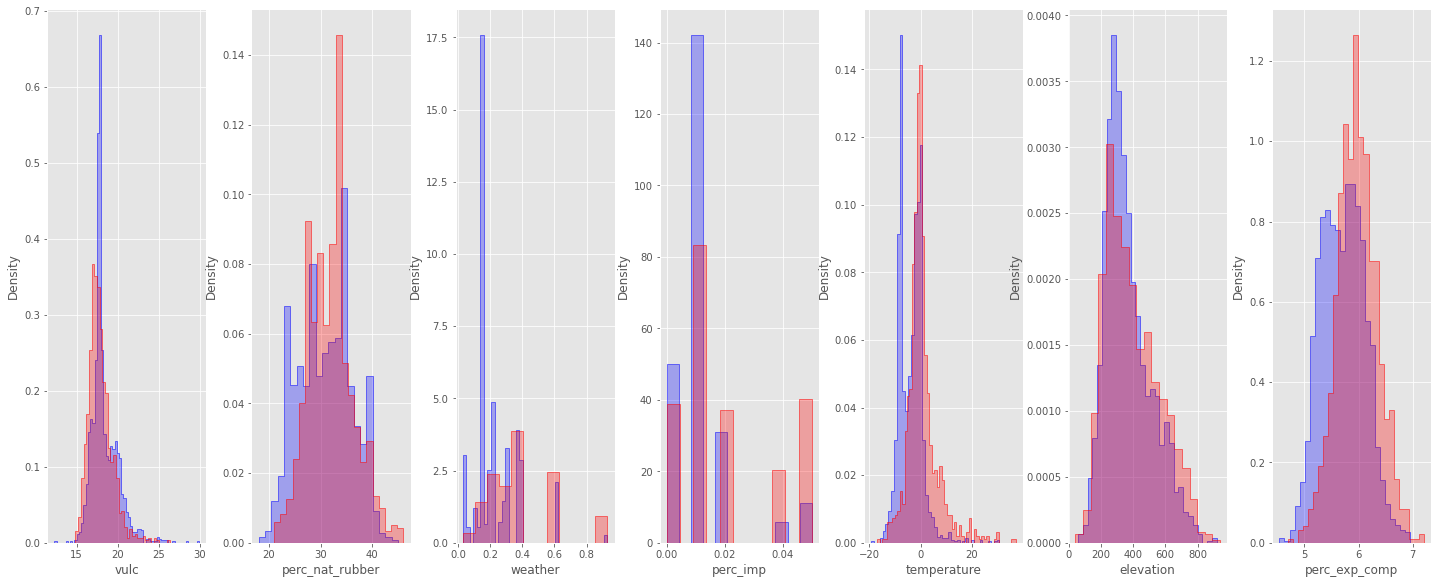

In [100]:
# Visualize numerical variables
X0 = data_numerical[data_numerical['failure']==0]
X1 = data_numerical[data_numerical['failure']==1]
print(X0.shape)
print(X1.shape)
fig, axes = plt.subplots(ncols=7, nrows=1, figsize=(20,8))
fig.tight_layout()

data_num = data_numerical.iloc[:,0:-1]

for i, ax in zip(range(data_num.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()


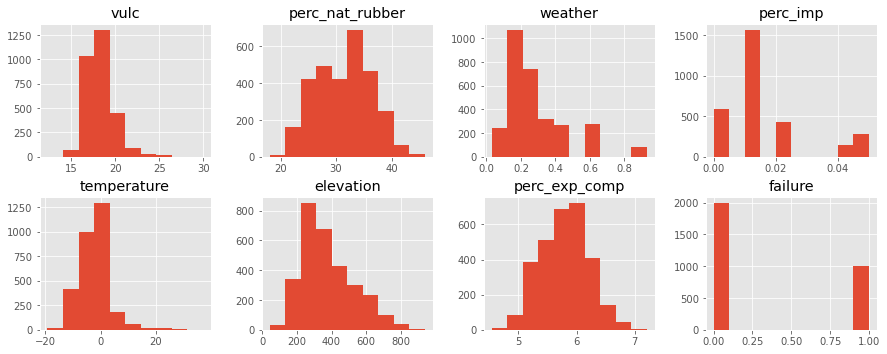

In [101]:
data_hist=data_numerical.hist(layout=(4,4), figsize=(15,12))

The variables present a quite symmetric distribution; some of them are slightly right skewed but do not present an exponential decrease. For this reason we maintain the original distribution without applying any logaritmic transormation.

<AxesSubplot:>

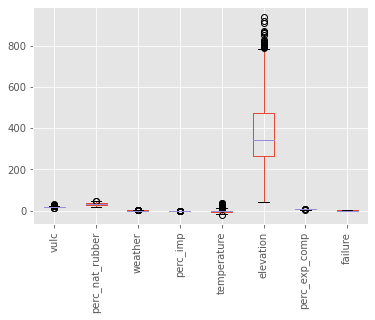

In [102]:
data_numerical.boxplot(rot=90)

Since the scale of numerical variables is too different, we will scale the train set and apply the same scaler on the test set after the split of the dataset.

Now that all the transformations on the original Dataset are concluded, we can create the final Dataset with all the modifications and include the target variable.

In [103]:
df=pd.concat([data_dummies,data_numerical],axis=1)
df['failure']=data_dropped['failure']

df.tail()

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,tread_depth_0,tread_depth_1,tread_depth_2,...,tyre_quality_0,tyre_quality_1,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,failure
2995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,17.818,29,0.39,0.01,7.28,287.5,5.68,1
2996,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,17.076,30,0.22,0.00,-1.44,152.5,5.81,1
2997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,16.170,33,0.39,0.01,-3.44,235.0,5.57,0
2998,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,18.872,37,0.03,0.00,-0.76,290.0,5.89,0
2999,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,20.272,33,0.06,0.00,2.80,405.0,6.00,0


# Creation of Train and Test Sets

In [104]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

In [105]:
#SPLIT DATA INTO TRAIN AND TEST SET
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, 
                                                    test_size =0.20, 
                                                    #shuffle is set True by default,
                                                    stratify=y, #preserve target proportions 
                                                    random_state= 42) 

print(X_train1.shape, X_test1.shape)

(2400, 35) (600, 35)


Through the "train_split_test" function we separated our data. Now we can scale tha numerical data contained in the train set and then apply the same scaler to the test set.

Once we have the new data scaled, we drop the previous numerical data and substitute them with the new ones.

In [106]:
# we have to scale the numerical variables of the train set --> then we apply the same scaler to the numerical variables of the test set
numerical=['vulc','perc_nat_rubber', 'weather', 'perc_imp', 'elevation','temperature', 'perc_exp_comp']


independent_variablesA=X_train1[numerical] #no target
independent_variablesB=X_test1[numerical] #no target

scaler_train = StandardScaler().fit(independent_variablesA) 
scaled_train = pd.DataFrame(scaler_train.transform(independent_variablesA))
scaled_train.columns = independent_variablesA.columns

scaled_test = pd.DataFrame(scaler_train.transform(independent_variablesB))
scaled_test.columns = independent_variablesB.columns
print(scaled_test.shape, scaled_train.shape)
scaled_test.head(10)

(600, 7) (2400, 7)


,vulc,perc_nat_rubber,weather,perc_imp,elevation,temperature,perc_exp_comp
0,-0.299530,-1.644094,-0.656931,-0.316066,-0.627192,-0.877116,-1.436695
1,-0.266915,-1.241992,1.828084,2.514375,1.044878,1.782521,1.039006
2,-0.312074,-1.241992,-0.656931,-0.316066,0.239807,-0.945488,-1.703683
3,-0.818857,0.969568,0.585577,-0.316066,0.044244,0.339890,1.184635
4,-0.461349,-1.040941,0.585577,-0.316066,-0.529410,0.025383,-0.708548
5,-0.217993,-1.241992,-0.656931,-0.316066,-0.659786,-1.034370,-0.902721
6,-1.521328,1.773772,3.502768,1.806765,-0.620673,1.078299,2.252585
7,-0.151509,-1.443043,-0.656931,-0.316066,-0.236064,-1.061719,-1.752226
8,0.714036,0.969568,-1.305195,-0.316066,1.729350,0.189474,0.820561
9,-0.663310,-0.638839,0.477532,0.391544,0.565747,2.103866,2.592387


<AxesSubplot:>

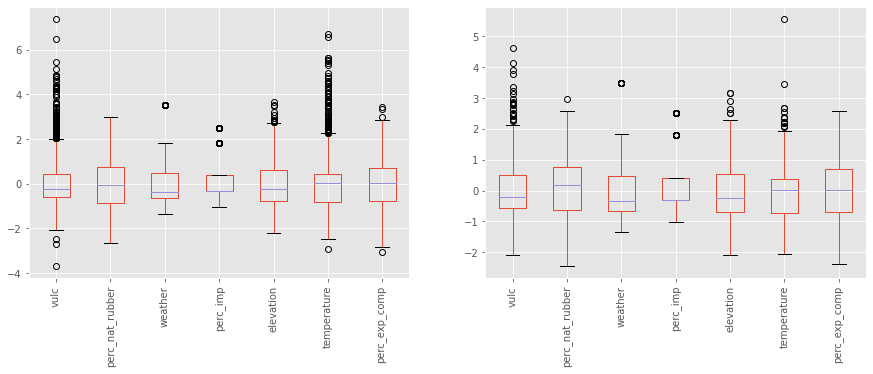

In [107]:
f, axes = plt.subplots(1, 2, figsize=(15,5))

scaled_train.boxplot(rot=90,ax=axes[0])
scaled_test.boxplot(rot=90,ax=axes[1])

In [108]:
# Save the scaler
import pickle
pickle.dump(scaler_train, open('scaler.pkl', 'wb'))

The two sets have been scaled correctly, so we can merge them with the categorical variables.

In [109]:
# subsitute original numerical variables with scaled numerical variables
scaled_train.index= independent_variablesA.index
scaled_test.index= independent_variablesB.index

train_dropped = X_train1.drop(columns=numerical)
test_dropped = X_test1.drop(columns=numerical)
print(test_dropped.shape, train_dropped.shape)

Xtrain2=pd.concat([train_dropped,scaled_train],axis=1)
Xtest2=pd.concat([test_dropped,scaled_test],axis=1)


(600, 28) (2400, 28)


In [110]:
# check correct substitution
print(Xtest2.isnull().sum(), Xtrain2.isnull().sum())

tread_type_0         0
tread_type_1         0
tread_type_2         0
tread_type_3         0
tread_type_4         0
tyre_season_0        0
tyre_season_1        0
tread_depth_0        0
tread_depth_1        0
tread_depth_2        0
tread_depth_3        0
month_0              0
month_1              0
month_10             0
month_11             0
month_2              0
month_3              0
month_4              0
month_5              0
month_6              0
month_7              0
month_8              0
month_9              0
wiring_strength_0    0
wiring_strength_1    0
wiring_strength_2    0
tyre_quality_0       0
tyre_quality_1       0
vulc                 0
perc_nat_rubber      0
weather              0
perc_imp             0
elevation            0
temperature          0
perc_exp_comp        0
dtype: int64 tread_type_0         0
tread_type_1         0
tread_type_2         0
tread_type_3         0
tread_type_4         0
tyre_season_0        0
tyre_season_1        0
tread_depth_0        

The substitution has been executed correctly so we can create the new scaled train and test sets.

In [111]:
# create new scaled datasets
df_train=pd.concat([Xtrain2,y_train1],axis=1)
df_test=pd.concat([Xtest2,y_test1], axis=1)

df_test.head(10)

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,tread_depth_0,tread_depth_1,tread_depth_2,...,tyre_quality_0,tyre_quality_1,vulc,perc_nat_rubber,weather,perc_imp,elevation,temperature,perc_exp_comp,failure
2448,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,-0.299530,-1.644094,-0.656931,-0.316066,-0.627192,-0.877116,-1.436695,0
982,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,-0.266915,-1.241992,1.828084,2.514375,1.044878,1.782521,1.039006,1
773,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,-0.312074,-1.241992,-0.656931,-0.316066,0.239807,-0.945488,-1.703683,0
901,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.818857,0.969568,0.585577,-0.316066,0.044244,0.339890,1.184635,1
399,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,-0.461349,-1.040941,0.585577,-0.316066,-0.529410,0.025383,-0.708548,1
2297,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,-0.217993,-1.241992,-0.656931,-0.316066,-0.659786,-1.034370,-0.902721,0
1615,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-1.521328,1.773772,3.502768,1.806765,-0.620673,1.078299,2.252585,1
2109,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,-0.151509,-1.443043,-0.656931,-0.316066,-0.236064,-1.061719,-1.752226,0
1042,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.714036,0.969568,-1.305195,-0.316066,1.729350,0.189474,0.820561,0
17,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,-0.663310,-0.638839,0.477532,0.391544,0.565747,2.103866,2.592387,1


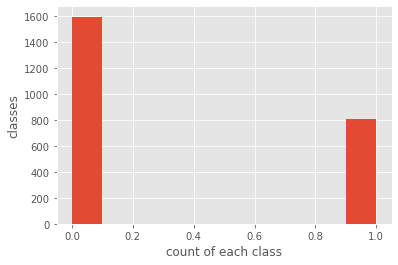

0    1594
1     806
Name: failure, dtype: int64

In [112]:
plt.hist(y_train1)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()
df_train.failure.value_counts()

The previous histogram describes perfectly the unbalance of the original Dataset concerning the target classes 1 and 0. Also the train set (randomly generated from the original one) remains that way, so we can try to perform oversampling on target 1 to see if the F1 score gets better during identificaiton of the best model.

We thought to apply the oversample to the train set because we have a strong difference between the number of success (1594) and the number of failure (806). 

In [113]:
#resample train set
df_majority = df_train[df_train.failure==0]
df_minority = df_train[df_train.failure==1] 
print(df_majority.shape[0],df_minority.shape[0])

df_minority_overs = resample(df_minority, 
                                replace=True,
                                n_samples=1300, # not complete oversampling
                                random_state=42)  

df_overs_train = pd.concat([df_minority_overs, df_majority])

df_overs_train.failure.value_counts()


1594 806


0    1594
1    1300
Name: failure, dtype: int64

In [114]:
from sklearn.utils import shuffle
df_oversampled_train = shuffle(df_overs_train)

We will try to perform the identification of the best model on the oversampled data and the non-oversampled data, to compare the different F1 scores. 
We idenfify two different DataFrames to be used as train and one single DataFrame to be used as Test set. 

In [115]:
#Separate X and y on the new DataFrames
# Dataframes with oversample
X2_train=df_overs_train.iloc[:,0:-1]
y2_train=df_overs_train.iloc[:,-1]

#DataFrames without oversample
X_train=df_train.iloc[:,0:-1]
y_train=df_train.iloc[:,-1]

X_test = df_test.iloc[:,0:-1]
y_test = df_test.iloc[:,-1]

print(X2_train.shape,X_train.shape,X_test.shape)

(2894, 35) (2400, 35) (600, 35)


# Models 

## Needed functions 

Here we define some functions that will be used in the following analysis to perform the research of the best parameters and the visualization of the ROC curve

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [117]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred)))
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred)))
    print("")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
 

In [118]:
def hyperp_search_over(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X2_train, y2_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X2_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y2_train, y_pred_train), f1_score(y_test, y_pred)))
    print("precision  train %.3f   test %.3f" % (precision_score(y2_train, y_pred_train), precision_score(y_test, y_pred)))
    print("")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
 

In [119]:
def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test)

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

## Research of the best model

For every model family, we search for the best model by first using the non-oversampled train set and then the oversampled one, successively compare the F1 score with the same test set.

If the values of F1 score obtained with the oversampled train will result better, we will try to fit the best model found here with the non-oversampled data.

### TREE

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['gini','entropy'], 
              'max_depth': [2,3,4],
              'min_samples_split': [2,4,6,8,12,16,18,20],
              'min_samples_leaf': [4,6,8,12,16,18,20]}

In [35]:
hyperp_search(classifier,parameters)

f1_train: 0.523424 using {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
f1         train 0.635   test 0.592
precision  train 0.675   test 0.611

[[324  74]
 [ 86 116]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       398
           1       0.61      0.57      0.59       202

    accuracy                           0.73       600
   macro avg       0.70      0.69      0.70       600
weighted avg       0.73      0.73      0.73       600



In [36]:
hyperp_search_over(classifier,parameters)

f1_train: 0.711945 using {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
f1         train 0.723   test 0.617
precision  train 0.643   test 0.497

[[232 166]
 [ 38 164]]
              precision    recall  f1-score   support

           0       0.86      0.58      0.69       398
           1       0.50      0.81      0.62       202

    accuracy                           0.66       600
   macro avg       0.68      0.70      0.66       600
weighted avg       0.74      0.66      0.67       600



In [37]:
model_Tree= DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, min_samples_leaf= 4, min_samples_split= 2)

In [39]:
model_Tree.fit(X_train, y_train)
y_pred_train=model_Tree.predict(X2_train)
y_pred=model_Tree.predict(X_test)

print("f1_train: ", f1_score(y2_train, y_pred_train))
print("f1_test: ", f1_score(y_test, y_pred))

f1_train:  0.4501969611705121
f1_test:  0.40433212996389895


We have decided to fit the second model on the non-oversampled data, but the results are not as good as hoped. So we can discard this model.

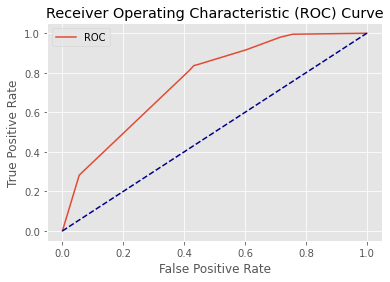

AUC: 0.76


In [40]:
#curva ROC
fpr1,tpr1=roc(model_Tree,X2_train,y2_train,X_test,y_test)

#### Plotting tree

In [120]:
from sklearn import tree
r = tree.export_text(model_Tree,feature_names=X_test.columns.tolist(),max_depth = 6 )
print(r)

|--- weather <= -0.63
|   |--- month_8 <= 0.50
|   |   |--- weather <= -1.22
|   |   |   |--- class: 0
|   |   |--- weather >  -1.22
|   |   |   |--- class: 0
|   |--- month_8 >  0.50
|   |   |--- tyre_season_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- tyre_season_0 >  0.50
|   |   |   |--- class: 0
|--- weather >  -0.63
|   |--- temperature <= 0.55
|   |   |--- vulc <= 1.03
|   |   |   |--- class: 1
|   |   |--- vulc >  1.03
|   |   |   |--- class: 0
|   |--- temperature >  0.55
|   |   |--- vulc <= 0.95
|   |   |   |--- class: 1
|   |   |--- vulc >  0.95
|   |   |   |--- class: 0



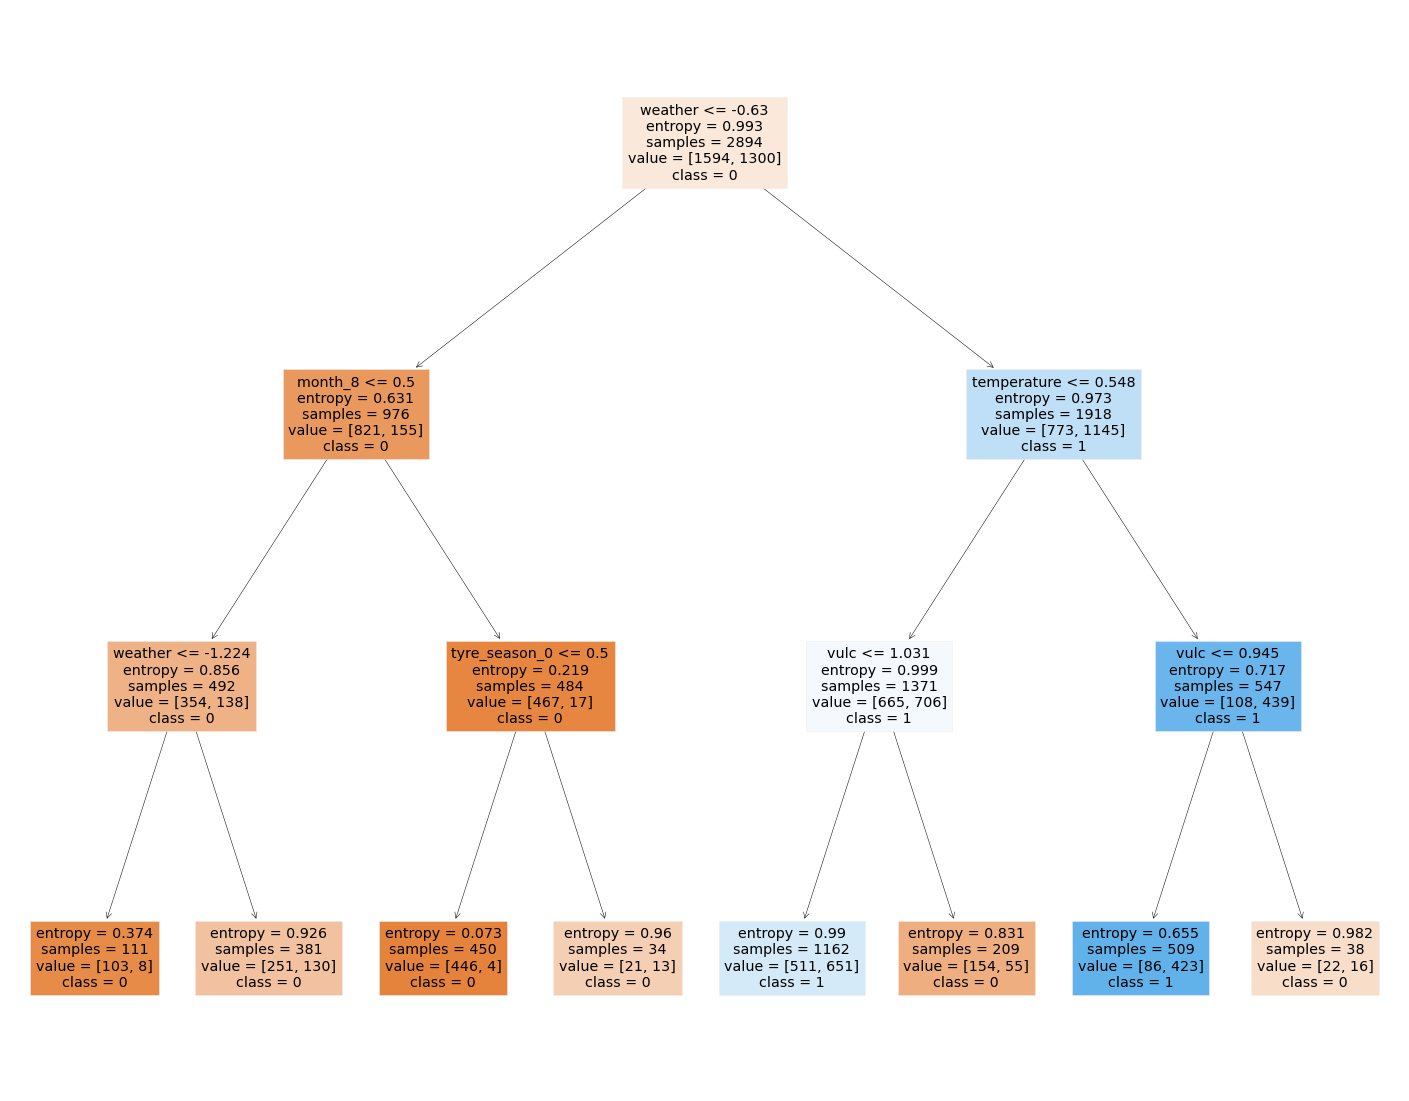

In [121]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_Tree, 
                   feature_names=X_test.columns.tolist(),  
                   class_names=['0','1'],
                   filled=True)

### KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(50,120,2)}


In [123]:
hyperp_search(classifier,parameters)

f1_train: 0.527614 using {'n_neighbors': 52}
f1         train 0.557   test 0.537
precision  train 0.705   test 0.677

[[355  43]
 [112  90]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       398
           1       0.68      0.45      0.54       202

    accuracy                           0.74       600
   macro avg       0.72      0.67      0.68       600
weighted avg       0.73      0.74      0.73       600



In [124]:
hyperp_search_over(classifier,parameters)

f1_train: 0.689664 using {'n_neighbors': 92}
f1         train 0.699   test 0.591
precision  train 0.721   test 0.578

[[309  89]
 [ 80 122]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       398
           1       0.58      0.60      0.59       202

    accuracy                           0.72       600
   macro avg       0.69      0.69      0.69       600
weighted avg       0.72      0.72      0.72       600



In [46]:
model_knn = KNeighborsClassifier(n_neighbors=92)

In [69]:
model_knn.fit(X_train, y_train)
y_pred_train=model_knn.predict(X_train)
y_pred=model_knn.predict(X_test)

print("f1_train: ", f1_score(y_train, y_pred_train))
print("f1_test: ", f1_score(y_test, y_pred))

f1_train:  0.5241809672386896
f1_test:  0.5125000000000001


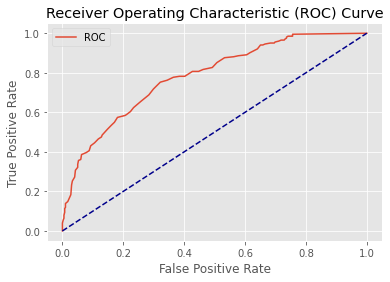

AUC: 0.78


In [125]:
#curva ROC
fpr2,tpr2=roc(model_knn,X2_train,y2_train,X_test,y_test)

### NAYVE BAYES

In [49]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
y_pred_train=model_NB.predict(X_train)

y_pred=model_NB.predict(X_test)

from sklearn.metrics import f1_score
print("f1_train: ", f1_score(y_train, y_pred_train))


print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_train:  0.5921625544267054
f1_test:  0.6073500967117988
[[240 158]
 [ 45 157]]
              precision    recall  f1-score   support

           0       0.84      0.60      0.70       398
           1       0.50      0.78      0.61       202

    accuracy                           0.66       600
   macro avg       0.67      0.69      0.66       600
weighted avg       0.73      0.66      0.67       600



In [50]:
model_NB.fit(X2_train, y2_train)
y_pred_train=model_NB.predict(X2_train)

y_pred=model_NB.predict(X_test)

from sklearn.metrics import f1_score
print("f1_train: ", f1_score(y2_train, y_pred_train))


print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_train:  0.673421141506248
f1_test:  0.6142034548944337
[[239 159]
 [ 42 160]]
              precision    recall  f1-score   support

           0       0.85      0.60      0.70       398
           1       0.50      0.79      0.61       202

    accuracy                           0.67       600
   macro avg       0.68      0.70      0.66       600
weighted avg       0.73      0.67      0.67       600



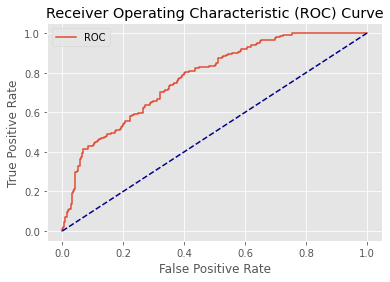

AUC: 0.77


In [126]:
#curva ROC
fpr3,tpr3=roc(model_NB,X2_train,y2_train,X_test,y_test)

### LOGISTIC REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "penalty":['l2'], "max_iter":[500,1000,10000] }

In [127]:
hyperp_search(classifier,parameters)

f1_train: 0.527614 using {'n_neighbors': 52}
f1         train 0.557   test 0.537
precision  train 0.705   test 0.677

[[355  43]
 [112  90]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       398
           1       0.68      0.45      0.54       202

    accuracy                           0.74       600
   macro avg       0.72      0.67      0.68       600
weighted avg       0.73      0.74      0.73       600



In [128]:
hyperp_search_over(classifier,parameters)

f1_train: 0.689664 using {'n_neighbors': 92}
f1         train 0.699   test 0.591
precision  train 0.721   test 0.578

[[309  89]
 [ 80 122]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       398
           1       0.58      0.60      0.59       202

    accuracy                           0.72       600
   macro avg       0.69      0.69      0.69       600
weighted avg       0.72      0.72      0.72       600



In [129]:
model_Log = LogisticRegression(C=10, max_iter=500,penalty='l2')

In [130]:
model_Log.fit(X2_train, y2_train)
y_pred_train=model_Log.predict(X_train)
y_pred=model_Log.predict(X_test)

print("f1_train: ", f1_score(y_train, y_pred_train))
print("f1_test: ", f1_score(y_test, y_pred))



f1_train:  0.6371578334304019
f1_test:  0.6666666666666667


By applyng the model found with the oversampled data on the non-oversampled data, we can see that the F1 score of the training set sliglhy reduce but the F1 score of the test set is increased. Also, the overfitting is not present with this model.

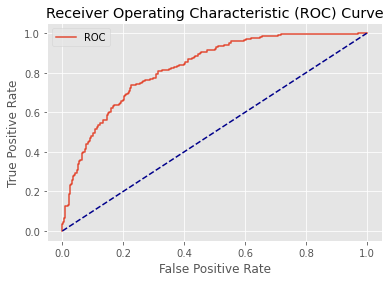

AUC: 0.82


In [131]:
#curva ROC
fpr4,tpr4=roc(model_Log,X2_train,y2_train,X_test,y_test)

### SVM

In [59]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.001,0.005,0.01,0.05,0.1],"gamma":[0.01,0.1,1]}


In [60]:
hyperp_search(classifier,parameters)

f1_train: 0.552625 using {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
f1         train 0.562   test 0.562
precision  train 0.703   test 0.746

[[367  31]
 [111  91]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       398
           1       0.75      0.45      0.56       202

    accuracy                           0.76       600
   macro avg       0.76      0.69      0.70       600
weighted avg       0.76      0.76      0.74       600



In [61]:
hyperp_search_over(classifier,parameters)

f1_train: 0.699338 using {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
f1         train 0.728   test 0.636
precision  train 0.752   test 0.602

[[308  90]
 [ 66 136]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       398
           1       0.60      0.67      0.64       202

    accuracy                           0.74       600
   macro avg       0.71      0.72      0.72       600
weighted avg       0.75      0.74      0.74       600



In [65]:
model_SVC = SVC(C=0.1, kernel='rbf',gamma=0.1,probability=True)

In [67]:
model_SVC.fit(X_train, y_train)
y_pred_train=model_SVC.predict(X_train)
y_pred=model_SVC.predict(X_test)

print("f1_train: ", f1_score(y_train, y_pred_train))
print("f1_test: ", f1_score(y_test, y_pred))

f1_train:  0.5258141382049245
f1_test:  0.4967320261437908


Although the overfitting is acceptable, the F1 scores are both not satisfying.

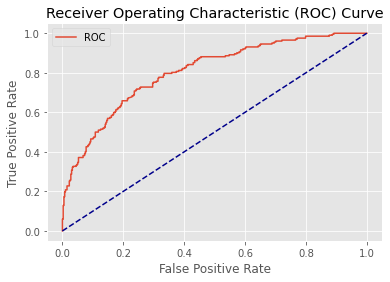

AUC: 0.80


In [133]:
fpr5,tpr5=roc(model_SVC,X2_train,y2_train,X_test,y_test)

### NEURAL NETWORK

In [134]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(7,5,3,2),(7,5,3),(10, 5),(10, 5,2)],  "max_iter": [1000,5000,10000], "alpha": [0.001,0.009,0.1,0.9,1]}


In [135]:
hyperp_search(classifier,parameters)

f1_train: 0.587840 using {'alpha': 0.9, 'hidden_layer_sizes': (10, 5, 2), 'max_iter': 1000}
f1         train 0.726   test 0.603
precision  train 0.718   test 0.593

[[313  85]
 [ 78 124]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       398
           1       0.59      0.61      0.60       202

    accuracy                           0.73       600
   macro avg       0.70      0.70      0.70       600
weighted avg       0.73      0.73      0.73       600



In [136]:
hyperp_search_over(classifier,parameters)

f1_train: 0.771149 using {'alpha': 0.001, 'hidden_layer_sizes': (10, 5, 2), 'max_iter': 5000}
f1         train 0.862   test 0.516
precision  train 0.888   test 0.580

[[330  68]
 [108  94]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       398
           1       0.58      0.47      0.52       202

    accuracy                           0.71       600
   macro avg       0.67      0.65      0.65       600
weighted avg       0.70      0.71      0.70       600



In [140]:
model_MLP = MLPClassifier(hidden_layer_sizes=(10,5,2), alpha=0.001, max_iter=5000)


In [141]:
model_MLP.fit(X_train, y_train)
y_pred_train=model_MLP.predict(X_train)
y_pred=model_MLP.predict(X_test)

print("f1_train: ", f1_score(y_train, y_pred_train))
print("f1_test: ", f1_score(y_test, y_pred))

f1_train:  0.774708410067526
f1_test:  0.565110565110565


With this family of model we have too much overfitting in any considered case, so we discard the models.

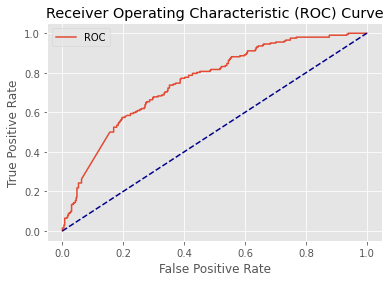

AUC: 0.75


In [143]:
#curva ROC
fpr6,tpr6=roc(model_MLP,X2_train,y2_train,X_test,y_test)

### RANDOM FOREST

In [86]:
from sklearn.ensemble import RandomForestClassifier


classifier= RandomForestClassifier()
parameters = {'n_estimators' :     np.arange(2,8,1),
              'criterion' :        ['entropy', 'gini'],
              'max_depth' :        np.arange(2,5,1), 
              'min_samples_split': np.arange(4,18,1),
              'min_samples_leaf' : np.arange(4,18,1),
              #'class_weight' : ["balanced"]
             };



In [87]:
hyperp_search(classifier,parameters)

f1_train: 0.560250 using {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 2}
f1         train 0.537   test 0.525
precision  train 0.678   test 0.638

[[347  51]
 [112  90]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       398
           1       0.64      0.45      0.52       202

    accuracy                           0.73       600
   macro avg       0.70      0.66      0.67       600
weighted avg       0.72      0.73      0.71       600



In [88]:
hyperp_search_over(classifier,parameters)

f1_train: 0.730040 using {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 12, 'n_estimators': 7}
f1         train 0.739   test 0.630
precision  train 0.678   test 0.521

[[250 148]
 [ 41 161]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73       398
           1       0.52      0.80      0.63       202

    accuracy                           0.69       600
   macro avg       0.69      0.71      0.68       600
weighted avg       0.75      0.69      0.69       600



In [73]:
model_RandomForest = RandomForestClassifier(criterion='gini', max_depth=4,min_samples_leaf = 9, min_samples_split= 12, n_estimators= 7)


In [144]:
model_RandomForest.fit(X_train, y_train)
y_pred_train=model_RandomForest.predict(X_train)
y_pred=model_RandomForest.predict(X_test)

print("f1_train: ", f1_score(y_train, y_pred_train))
print("f1_test: ", f1_score(y_test, y_pred))

f1_train:  0.6427586206896551
f1_test:  0.61101243339254


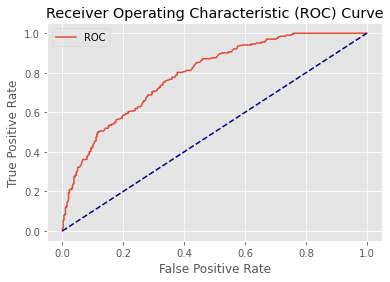

AUC: 0.79


In [145]:
#curva ROC
fpr7,tpr7=roc(model_RandomForest,X2_train,y2_train,X_test,y_test)

### ADABOOST

In [79]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
parameters = {'n_estimators' : [1000,2000,5000,8000,10000], 'learning_rate' : [0.001,0.01,0.1]}


In [80]:
hyperp_search(classifier, parameters)

f1_train: 0.573675 using {'learning_rate': 0.01, 'n_estimators': 5000}
f1         train 0.620   test 0.553
precision  train 0.677   test 0.635

[[341  57]
 [103  99]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       398
           1       0.63      0.49      0.55       202

    accuracy                           0.73       600
   macro avg       0.70      0.67      0.68       600
weighted avg       0.72      0.73      0.72       600



In [81]:
hyperp_search_over(classifier, parameters)

f1_train: 0.728385 using {'learning_rate': 0.1, 'n_estimators': 8000}
f1         train 0.787   test 0.597
precision  train 0.777   test 0.576

[[306  92]
 [ 77 125]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       398
           1       0.58      0.62      0.60       202

    accuracy                           0.72       600
   macro avg       0.69      0.69      0.69       600
weighted avg       0.72      0.72      0.72       600



In [82]:
model_Ada = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 8000)

In [83]:
model_Ada.fit(X_train, y_train)
y_pred_train=model_Ada.predict(X_train)
y_pred=model_Ada.predict(X_test)

print("f1_train: ", f1_score(y_train, y_pred_train))
print("f1_test: ", f1_score(y_test, y_pred))

f1_train:  0.6928104575163399
f1_test:  0.5493333333333335


With this family of model we have too much overfitting in any considered case, so we discard the models.

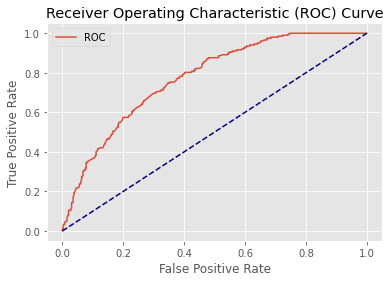

AUC: 0.77


In [147]:
#curva ROC
fpr8,tpr8=roc(model_RandomForest,X2_train,y2_train,X_test,y_test)

# CHOICE OF THE MODEL

After evalutaing every family of models, by analyzing the F1 scores we decided to find acceptable only the models found with SVM, Logistic Regression and RandomForest.
Among these models we considered as the best model the one found with Logistic Regression method, beacuse the F1 scores, the precision scores and the accuracy are slightly better than the other models, and also the overfitting is minimum.

In [148]:
pickle.dump(model_Log, open('LogisticRegression_model.pkl', 'wb'))

# TEST 

In [1]:
data_test = pd.read_csv("/kaggle/input/tyres-test/tyres_test.csv", sep = ",")

data_test.head(10)
print(data_test.shape)

In [151]:
data_test = pd.read_csv("tyres_test.csv", sep = ",")

data_test.head(10)
print(data_test.shape)

(7984, 15)


In [152]:
#dropping 'diameter' 
d = ["diameter"]
data_dropped_test = data_test.drop(columns=d)

print(data_dropped_test.shape)
data_dropped_test.head()

(7984, 14)


,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers
0,17.180,30,1,0.21,0.00,-9.24,0,1,460.5,4,3,0,5.54,1
1,17.744,24,1,0.16,0.01,-9.12,0,1,278.5,8,0,1,5.01,1
2,16.930,34,0,0.27,0.01,3.64,2,0,733.5,11,2,0,6.41,1
3,22.428,34,1,0.03,0.00,0.56,3,0,235.5,9,3,0,5.95,1
4,16.818,29,1,0.06,0.00,-0.96,3,0,461.0,9,0,1,5.97,1


In [153]:
selection_categorical=['tread_type', 'tyre_season','month', 'tread_depth', 'wiring_strength', 'tyre_quality',
       'add_layers']
data_categorical2 = data_dropped_test[selection_categorical]

In [154]:
#drop of add_layers
d = ['add_layers']

data_categorical_dropped = data_categorical2.drop(columns = d)
selection_categorical = ['tread_type', 'tyre_season', 'tread_depth','month', 'wiring_strength', 'tyre_quality']
print(data_categorical_dropped.shape)
data_categorical_dropped.head()

(7984, 6)


,tread_type,tyre_season,month,tread_depth,wiring_strength,tyre_quality
0,0,1,4,3,1,0
1,0,1,8,0,1,1
2,2,0,11,2,0,0
3,3,0,9,3,1,0
4,3,0,9,0,1,1


In [155]:
from sklearn.preprocessing import OneHotEncoder
encod = OneHotEncoder(handle_unknown='ignore')

data_dummies2=pd.DataFrame()
for i in range(len(selection_categorical)):
    encod.fit(data_dropped_test[[selection_categorical[i]]].astype(str))
    dummies = encod.transform(data_dropped_test[[selection_categorical[i]]].astype(str)).toarray()
    for k in range(len(encod.categories_[0])):
        encod.categories_[0][k]=selection_categorical[i]+"_"+str(encod.categories_[0][k])
    data_dummies2=pd.concat([data_dummies2,pd.DataFrame(dummies,columns=encod.categories_[0])],axis=1)
    
data_dummies2.head()

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,tread_depth_0,tread_depth_1,tread_depth_2,...,month_5,month_6,month_7,month_8,month_9,wiring_strength_0,wiring_strength_1,wiring_strength_2,tyre_quality_0,tyre_quality_1
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [156]:
selection_numerical=['vulc', 'perc_nat_rubber', 'weather', 'perc_imp', 'temperature', 'elevation',
       'perc_exp_comp']
data_numerical2 = data_dropped_test[selection_numerical]

In [157]:
#total dataset test
df_test = pd.concat([data_dummies2, data_numerical2],axis=1)

print(df_test.shape)
df_test.head(10)

(7984, 35)


,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,tread_depth_0,tread_depth_1,tread_depth_2,...,wiring_strength_2,tyre_quality_0,tyre_quality_1,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,17.180,30,0.21,0.00,-9.24,460.5,5.54
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,17.744,24,0.16,0.01,-9.12,278.5,5.01
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,16.930,34,0.27,0.01,3.64,733.5,6.41
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,22.428,34,0.03,0.00,0.56,235.5,5.95
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,16.818,29,0.06,0.00,-0.96,461.0,5.97
5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,17.284,27,0.16,0.01,-11.76,251.5,5.30
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,20.050,32,0.30,0.01,-4.24,552.5,5.58
7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,17.932,24,0.16,0.01,-7.48,283.5,5.23
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,16.486,33,0.62,0.05,-1.84,305.0,6.14
9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,17.690,25,0.16,0.01,-8.56,385.5,5.96


In [103]:
import pickle
import pandas as pd
import numpy as np
import math
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [158]:
# load scaler and the model
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))

In [159]:
#scaling of numerical variables with same scaler used in the train

selection_numerical=['vulc', 'perc_nat_rubber', 'weather', 'perc_imp', 'elevation','temperature',
       'perc_exp_comp']
data_numerical2 = df_test[selection_numerical]
scaled_df = pd.DataFrame(loaded_scaler.transform(data_numerical2))
scaled_df.columns = data_numerical2.columns

scaled_df

,vulc,perc_nat_rubber,weather,perc_imp,elevation,temperature,perc_exp_comp
0,-0.628186,-0.236737,-0.386820,-1.023676,0.539671,-1.184787,-0.611462
1,-0.274442,-1.443043,-0.656931,-0.316066,-0.646748,-1.164275,-1.897855
2,-0.784988,0.567466,-0.062688,-0.316066,2.319301,1.016765,1.500166
3,2.663394,0.567466,-1.359218,-1.023676,-0.927056,0.490307,0.383673
4,-0.855235,-0.437788,-1.197151,-1.023676,0.542931,0.230496,0.432216
...,...,...,...,...,...,...,...
7979,1.178169,-0.035687,0.045356,-0.316066,-0.105689,0.462958,0.238044
7980,-0.290749,-2.046196,-0.656931,-0.316066,0.207213,-1.089067,-0.562919
7981,-0.171580,-1.644094,-0.656931,-0.316066,-0.728233,-0.788234,-1.436695
7982,-0.166562,-0.638839,-0.656931,-0.316066,-0.500075,-0.959162,-0.077487


In [160]:
# Feature selection
X2 = pd.concat([data_dummies2, scaled_df], axis = 1)

print(X2.shape)
X2.head()

(7984, 35)


,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,tread_depth_0,tread_depth_1,tread_depth_2,...,wiring_strength_2,tyre_quality_0,tyre_quality_1,vulc,perc_nat_rubber,weather,perc_imp,elevation,temperature,perc_exp_comp
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.628186,-0.236737,-0.386820,-1.023676,0.539671,-1.184787,-0.611462
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,-0.274442,-1.443043,-0.656931,-0.316066,-0.646748,-1.164275,-1.897855
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-0.784988,0.567466,-0.062688,-0.316066,2.319301,1.016765,1.500166
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.663394,0.567466,-1.359218,-1.023676,-0.927056,0.490307,0.383673
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,-0.855235,-0.437788,-1.197151,-1.023676,0.542931,0.230496,0.432216


In [162]:
loaded_model=pickle.load(open('LogisticRegression_model.pkl', 'rb'))

In [191]:
y_test_predictions = loaded_model.predict(X2)
y_test_predictions.size

7984

In [193]:
np.savetxt("Predictions.txt", y_test_predictions, fmt='%d')